In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_DA_salaries.csv")
df
np.random.seed(0)

In [3]:
#Clean up the-1 values and adding them to the "Unknown" group
df["Size"]=df["Size"].replace({'-1':'Unknown'})
company_size=df.groupby("Size").nunique()
company_size

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector
Size,,,,,,,,,
1 to 50 employees,239,82,268,93,164,1,12,39,20
10000+ employees,291,83,193,98,120,1,8,54,19
1001 to 5000 employees,249,84,230,103,117,1,10,54,23
201 to 500 employees,165,80,185,72,118,1,11,44,20
5001 to 10000 employees,81,52,74,42,49,1,7,29,15
501 to 1000 employees,152,80,138,71,87,1,5,39,21
51 to 200 employees,222,82,261,110,149,1,10,44,23
Unknown,148,74,165,74,29,1,5,7,6


In [4]:
df=df.replace({'-1':np.NaN})
df.head(1)

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit


In [5]:
df=df.dropna()
df.head(1)

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit


In [26]:
#Cleaning 'LoanRange' column by getting rid of unnecessary text
minimum_salary = df['Salary Estimate'].apply(lambda x: x.split('-')[0])
maximum_salary = df['Salary Estimate'].apply(lambda x: x.split('-')[1])
subtract_glassdoor_unit = maximum_salary.apply(lambda x: x.replace('(Glassdoor est.)', ''))
maximum_salary= subtract_glassdoor_unit
# #Separting loan range into minimum and maximum values 
# #Cleaning up commas and converting data type to integer
minimum_salary = minimum_salary.apply(lambda x: x.replace('K', ''))
maximum_salary = maximum_salary.apply(lambda x: x.replace('K', ''))
minimum_salary = minimum_salary.apply(lambda x: int(x.replace('$', '')))
maximum_salary = maximum_salary.apply(lambda x: int(x.replace('$', '')))

#Getting rid of ratings for company name
Company_name = df['Company Name'].apply(lambda x: x.split('\n')[0])
df['Company Name'] = Company_name

In [7]:
company_size=df.groupby("Size").nunique()
company_size

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector
Size,,,,,,,,,
1 to 50 employees,185,77,194,76,118,1,11,38,19
10000+ employees,287,83,188,97,118,1,8,53,18
1001 to 5000 employees,244,84,224,102,115,1,10,53,22
201 to 500 employees,156,78,174,72,114,1,11,43,19
5001 to 10000 employees,80,52,73,42,49,1,7,28,14
501 to 1000 employees,148,79,132,68,81,1,5,38,20
51 to 200 employees,196,81,228,106,133,1,9,43,22
Unknown,8,8,6,5,6,1,3,6,5


In [27]:
company_size= df.groupby("Size").nunique()
company_size

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Min Salary,Max Salary,Average Salary
Size,,,,,,,,,,,,
1 to 50 employees,185,77,192,76,118,1,11,38,19,48,52,67
10000+ employees,287,83,188,97,118,1,8,53,18,49,56,71
1001 to 5000 employees,244,84,222,102,115,1,10,53,22,50,56,72
201 to 500 employees,156,78,172,72,114,1,11,43,19,48,55,67
5001 to 10000 employees,80,52,73,42,49,1,7,28,14,38,42,49
501 to 1000 employees,148,79,131,68,81,1,5,38,20,49,55,65
51 to 200 employees,196,81,227,106,133,1,9,43,22,50,57,70
Unknown,8,8,6,5,6,1,3,6,5,8,8,8


In [34]:
df['Min Salary'] = minimum_salary
df['Max Salary'] = maximum_salary
df['Average Salary'] = (maximum_salary + minimum_salary) / 2

In [46]:
Company_Information = df[['Company Name', 'Size', 'Type of ownership', 'Industry', 'Headquarters']]
Company_Information.head(1)
Company_Information.to_csv('Company_Information.csv', index = False)

In [47]:
Data_Analyst_Information = df[['Company Name', 'Job Title', 'Average Salary', 'Industry', 'Location', 'Min Salary', 'Max Salary']]
Data_Analyst_Information.head(1)
Data_Analyst_Information.to_csv('Data_Analyst_Information.csv', index = False)

In [48]:
Industry_Information = df[['Industry', 'Sector' , 'Type of ownership']]
Industry_Information.head(1)
Industry_Information.to_csv('Industry_Information.csv', index = False)

In [16]:
average_min_pay=df.groupby("Size").mean()['Min Salary']
average_max_pay=df.groupby("Size").mean()['Max Salary']
average_min_pay

Size
1 to 50 employees          56.413793
10000+ employees           51.915989
1001 to 5000 employees     54.792398
201 to 500 employees       53.285106
5001 to 10000 employees    55.593750
501 to 1000 employees      54.663366
51 to 200 employees        54.041995
Unknown                    59.500000
Name: Min Salary, dtype: float64

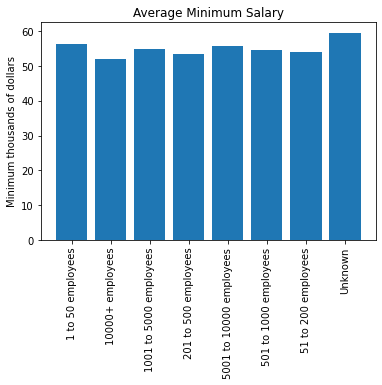

In [10]:
x=company_size.index
plt.bar(x, average_min_pay)
plt.title("Average Minimum Salary")
plt.xticks(x, rotation="vertical")
plt.ylabel("Minimum thousands of dollars")
plt.show()

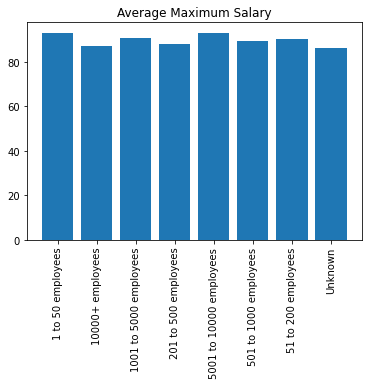

In [11]:
plt.bar(x, average_max_pay)
plt.title("Average Maximum Salary")
plt.xticks(x, rotation="vertical")
plt.show()

In [12]:
industry_type=df.groupby("Industry").nunique()
industry_type=industry_type.sort_values("Company Name",ascending=False) 
top_industry_type=industry_type.head(10)
top_industry_type

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Min Salary,Max Salary,Average Salary
Industry,,,,,,,,,,,,
IT Services,188,81,165,77,103,8,7,1,1,51,55,67
Staffing & Outsourcing,201,78,147,91,90,8,6,1,1,50,53,68
Health Care Services & Hospitals,124,64,110,55,62,7,9,1,1,45,46,54
Consulting,86,59,77,50,58,7,3,1,1,38,45,53
Computer Hardware & Software,83,52,74,41,50,7,4,1,1,39,38,47
Enterprise Software & Network Solutions,45,48,55,34,42,7,2,1,1,37,34,43
Internet,47,32,49,18,24,6,3,1,1,24,26,30
Investment Banking & Asset Management,71,42,44,27,23,7,5,1,1,31,32,38
Advertising & Marketing,37,36,37,23,26,7,3,1,1,29,30,35


In [13]:
average_min_pay_perIndustry=df.groupby("Industry").mean()['Min Salary']
average_max_pay_perIndustry=df.groupby("Industry").mean()['Max Salary']
average_min_pay_perIndustry

Industry
Accounting                              59.153846
Advertising & Marketing                 53.176471
Aerospace & Defense                     51.954545
Architectural & Engineering Services    52.461538
Audiovisual                             24.000000
                                          ...    
Utilities                               67.000000
Vehicle Dealers                         39.000000
Venture Capital & Private Equity        62.833333
Video Games                             50.800000
Wholesale                               58.333333
Name: Min Salary, Length: 88, dtype: float64

In [14]:
top_ten_min_avg=average_min_pay_perIndustry.loc[top_industry_type.index]
top_ten_min_avg

Industry
IT Services                                53.320988
Staffing & Outsourcing                     55.669811
Health Care Services & Hospitals           55.364238
Consulting                                 53.369369
Computer Hardware & Software               57.603604
Enterprise Software & Network Solutions    58.028986
Internet                                   58.430769
Investment Banking & Asset Management      48.525641
Advertising & Marketing                    53.176471
Banks & Credit Unions                      51.509804
Name: Min Salary, dtype: float64

In [15]:
top_ten_max_avg=average_max_pay_perIndustry.loc[top_industry_type.index]
top_ten_max_avg

Industry
IT Services                                 89.398148
Staffing & Outsourcing                      91.084906
Health Care Services & Hospitals            90.251656
Consulting                                  88.612613
Computer Hardware & Software                97.693694
Enterprise Software & Network Solutions     96.623188
Internet                                   100.892308
Investment Banking & Asset Management       82.628205
Advertising & Marketing                     92.019608
Banks & Credit Unions                       83.058824
Name: Max Salary, dtype: float64